# API Cookbook

This notebook contains examples of functions that can be reused from other notebooks. See the [use_cookbooks](use_cookbooks.ipynb) notebook that accompanies this one for a tutorial on how to take advantage of this cookbook.

The example functions in this notebook require `ipywidgets`, `pandas`, `matplotlib`, `seaborn`, `numexpr`, and `simplegist` to work completely.

In [1]:
# <help>

In [2]:
# <api>
%matplotlib inline

## Instaquery

In [3]:
# <api>
from IPython.display import display, Image
from ipywidgets import interact_manual

In [4]:
# <api>
def instaquery(df, renderer=lambda df, by: display(df)):
    '''
    Creates an interactive query widget with an optional custom renderer.
    
    df: DataFrame to query
    renderer: Render function of the form lambda df, by where df is the subset of the DataFrame rows
        matching the query and by is the column selected for a group-by option. The default render
        function simply displays the rows matching the query and ignores the group-by.
    '''
    by_vals = tuple(['---'] + list(df.columns))

    @interact_manual(query='', by=by_vals)
    def instaquery(query, by):
        '''Inner function that gets called when the user interacts with the widgets.'''
        try:
            sub_df = df.query(query)
        except ValueError as ex:
            sub_df = df
        # replace sentinel with None
        by = None if by == '---' else by
        renderer(sub_df, by)

The `instaquery` function is handy for quick, interactive exploration of a dataset. A quick introduction to the function appears below.  See https://github.com/ibm-et/jupyter-samples/blob/master/hacks/instaquery.ipynb for full details.

In [5]:
# <help:instaquery>
import pandas as pd
import seaborn as sns
df = sns.load_dataset('iris')

Pass the DataFrame `instaquery` to create three widgets: a query text box, a group-by dropdown, and a button. Then try the following:

1. Click *Run instaquery* without entering anything else.
2. Enter `petal_length > 3 & sepal_length > 7` in the query box and and click Run.

In [6]:
# <help:instaquery>
instaquery(df)

,sepal_length,sepal_width,petal_length,petal_width,species
102,7.1,3.0,5.9,2.1,virginica
105,7.6,3.0,6.6,2.1,virginica
107,7.3,2.9,6.3,1.8,virginica
109,7.2,3.6,6.1,2.5,virginica
117,7.7,3.8,6.7,2.2,virginica
118,7.7,2.6,6.9,2.3,virginica
122,7.7,2.8,6.7,2.0,virginica
125,7.2,3.2,6.0,1.8,virginica
129,7.2,3.0,5.8,1.6,virginica
130,7.4,2.8,6.1,1.9,virginica


Pass the DataFrame and a rendering function to control the output from `instaquery`. Then try the following:

1. Click *Run instaquery* without entering anything else.
2. Select `species` in the group-by dropdown.
3. Enter `petal_length > 3` in the query box and and click Run.

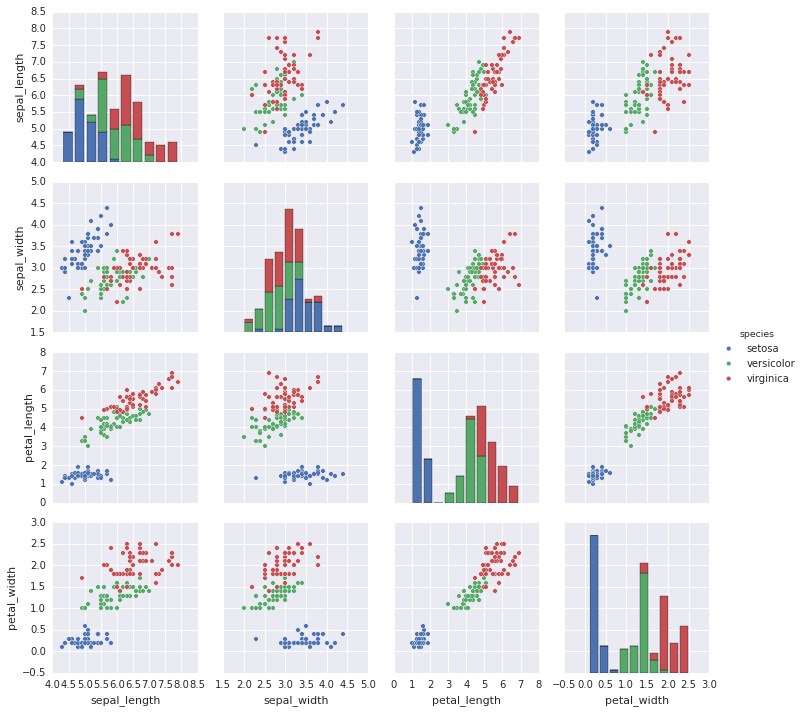

In [7]:
# <help:instaquery>
instaquery(df, lambda df, by: sns.pairplot(df, size=2.5, hue=by))

## Post as Gist

In [8]:
# <api>
def gist_it(api_token, content=None, filename=None, username='parente', gist_id=None):
    '''
    Publishes string content or a file on disk as a new gist or an update to an existing one.
    
    :param api_token: GitHub personal access token with gist authorization
    :param content: String content to post
    :param filename: String to a filename to post
    :param username: Your GitHub username
    :param gist_id: Gist ID to update; creates a new gist if None
    '''
    if content is None and filename is None:
        raise RuntimeError('must specify content or filename')
    import simplegist
    gist = simplegist.Simplegist(username=username, api_token=api_token)
    if content is None:
        with open(filename) as f:
            content = f.read()
    if gist_id:
        profile = gist.profile()
        return profile.edit(id=gist_id, content=content)
    else:
        return gist.create(name=filename if filename is not None else 'untitled', public=0, content=content)